In [1]:
import pandas as pd
import zipfile
from matplotlib import pyplot as plt
import os

In [2]:
with zipfile.ZipFile('189687_423331_compressed_companies_sorted.csv.zip') as z:
    with z.open('companies_sorted.csv') as f:
        data = pd.read_csv(f)
        print(data.head())

   Unnamed: 0                       name         domain  year founded  \
0     5872184                        ibm        ibm.com        1911.0   
1     4425416  tata consultancy services        tcs.com        1968.0   
2       21074                  accenture  accenture.com        1989.0   
3     2309813                    us army     goarmy.com        1800.0   
4     1558607                         ey         ey.com        1989.0   

                              industry size range  \
0  information technology and services     10001+   
1  information technology and services     10001+   
2  information technology and services     10001+   
3                             military     10001+   
4                           accounting     10001+   

                                 locality         country  \
0       new york, new york, united states   united states   
1              bombay, maharashtra, india           india   
2                 dublin, dublin, ireland         ireland  

In [3]:
upper = data['year founded']<2019
lower = data['year founded']>1800
data_adjusted = data[upper&lower]
usa = data_adjusted['country']=='united states'
it = data_adjusted['industry']=='information technology and services'
china = data_adjusted['country']=='china'

In [4]:
data_year = data_adjusted.groupby('year founded').count()

In [5]:
usa_data_year = data_adjusted[usa].groupby('year founded').count()

In [6]:
yearly_companies = data_adjusted.groupby('year founded').count()

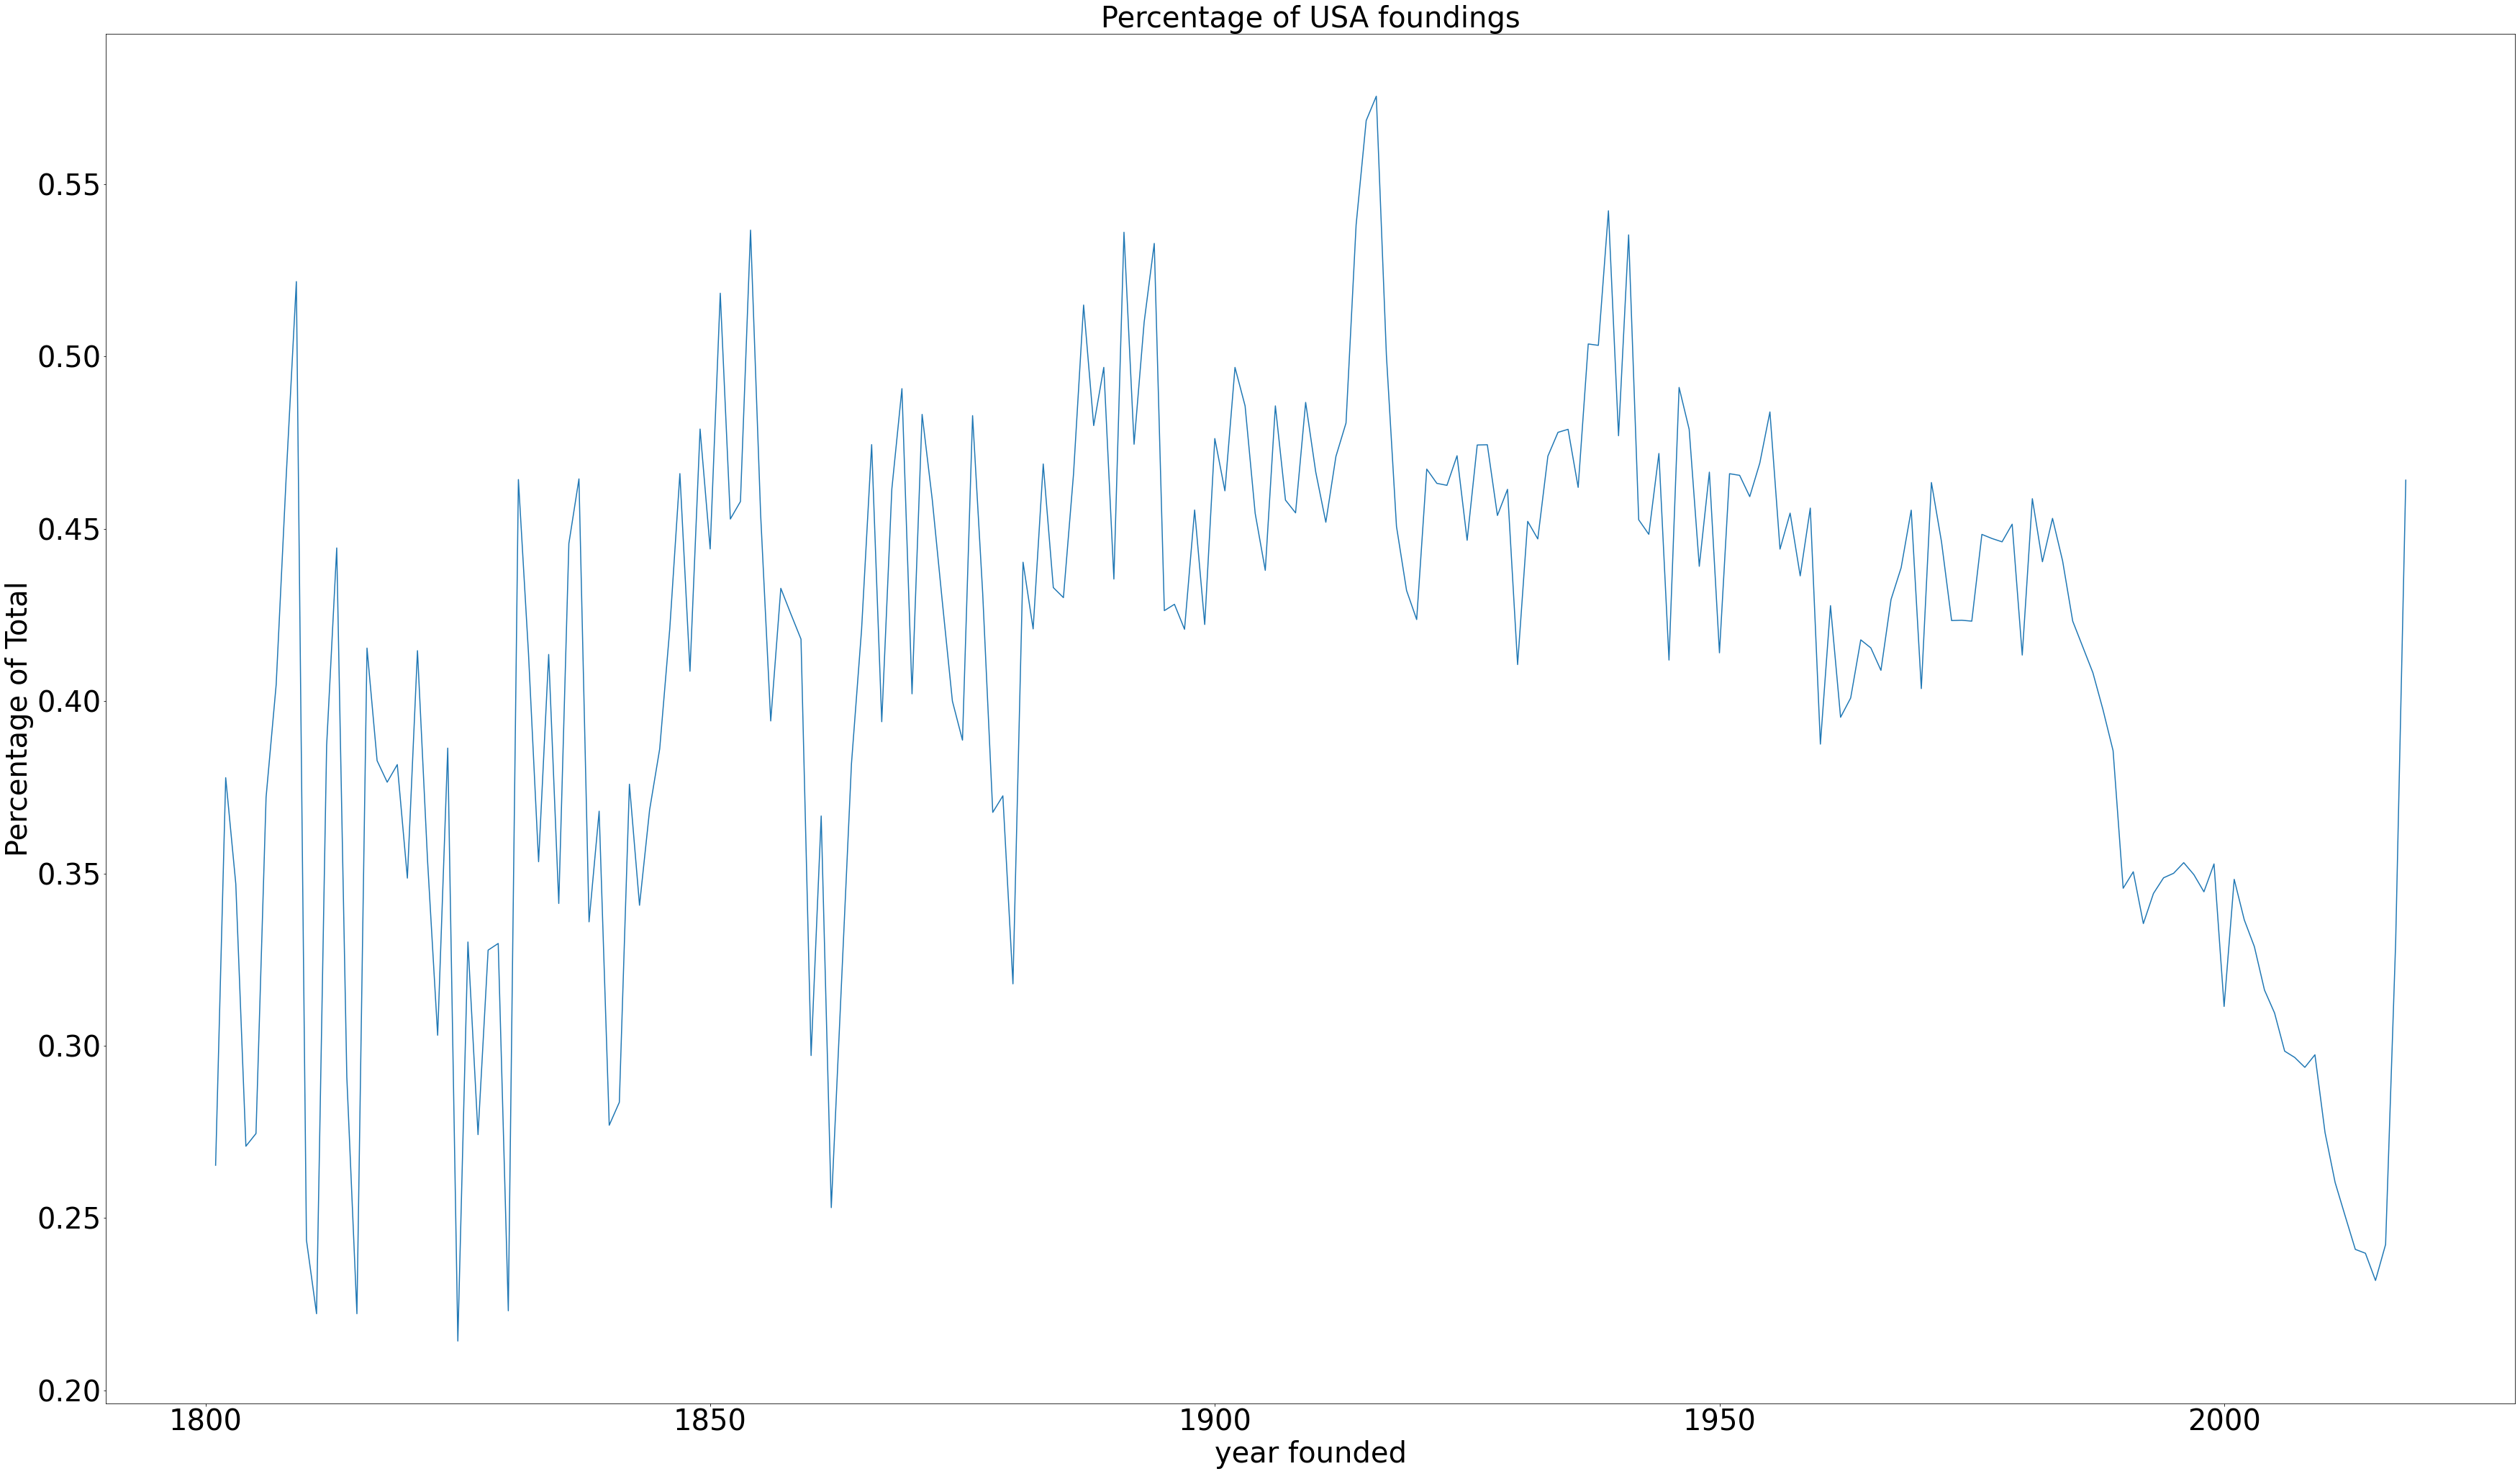

In [7]:
#percentage of USA companies over time
fig = plt.figure(figsize=(60,35)) 
plt.xlabel('Year Founded',fontsize=40)
plt.ylabel('Percentage of Total',fontsize=40)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title('Percentage of USA foundings',fontsize=40)


_=(usa_data_year['name']/yearly_companies['name']).plot()
os.chdir('images')
plt.savefig('usa foundings.png')

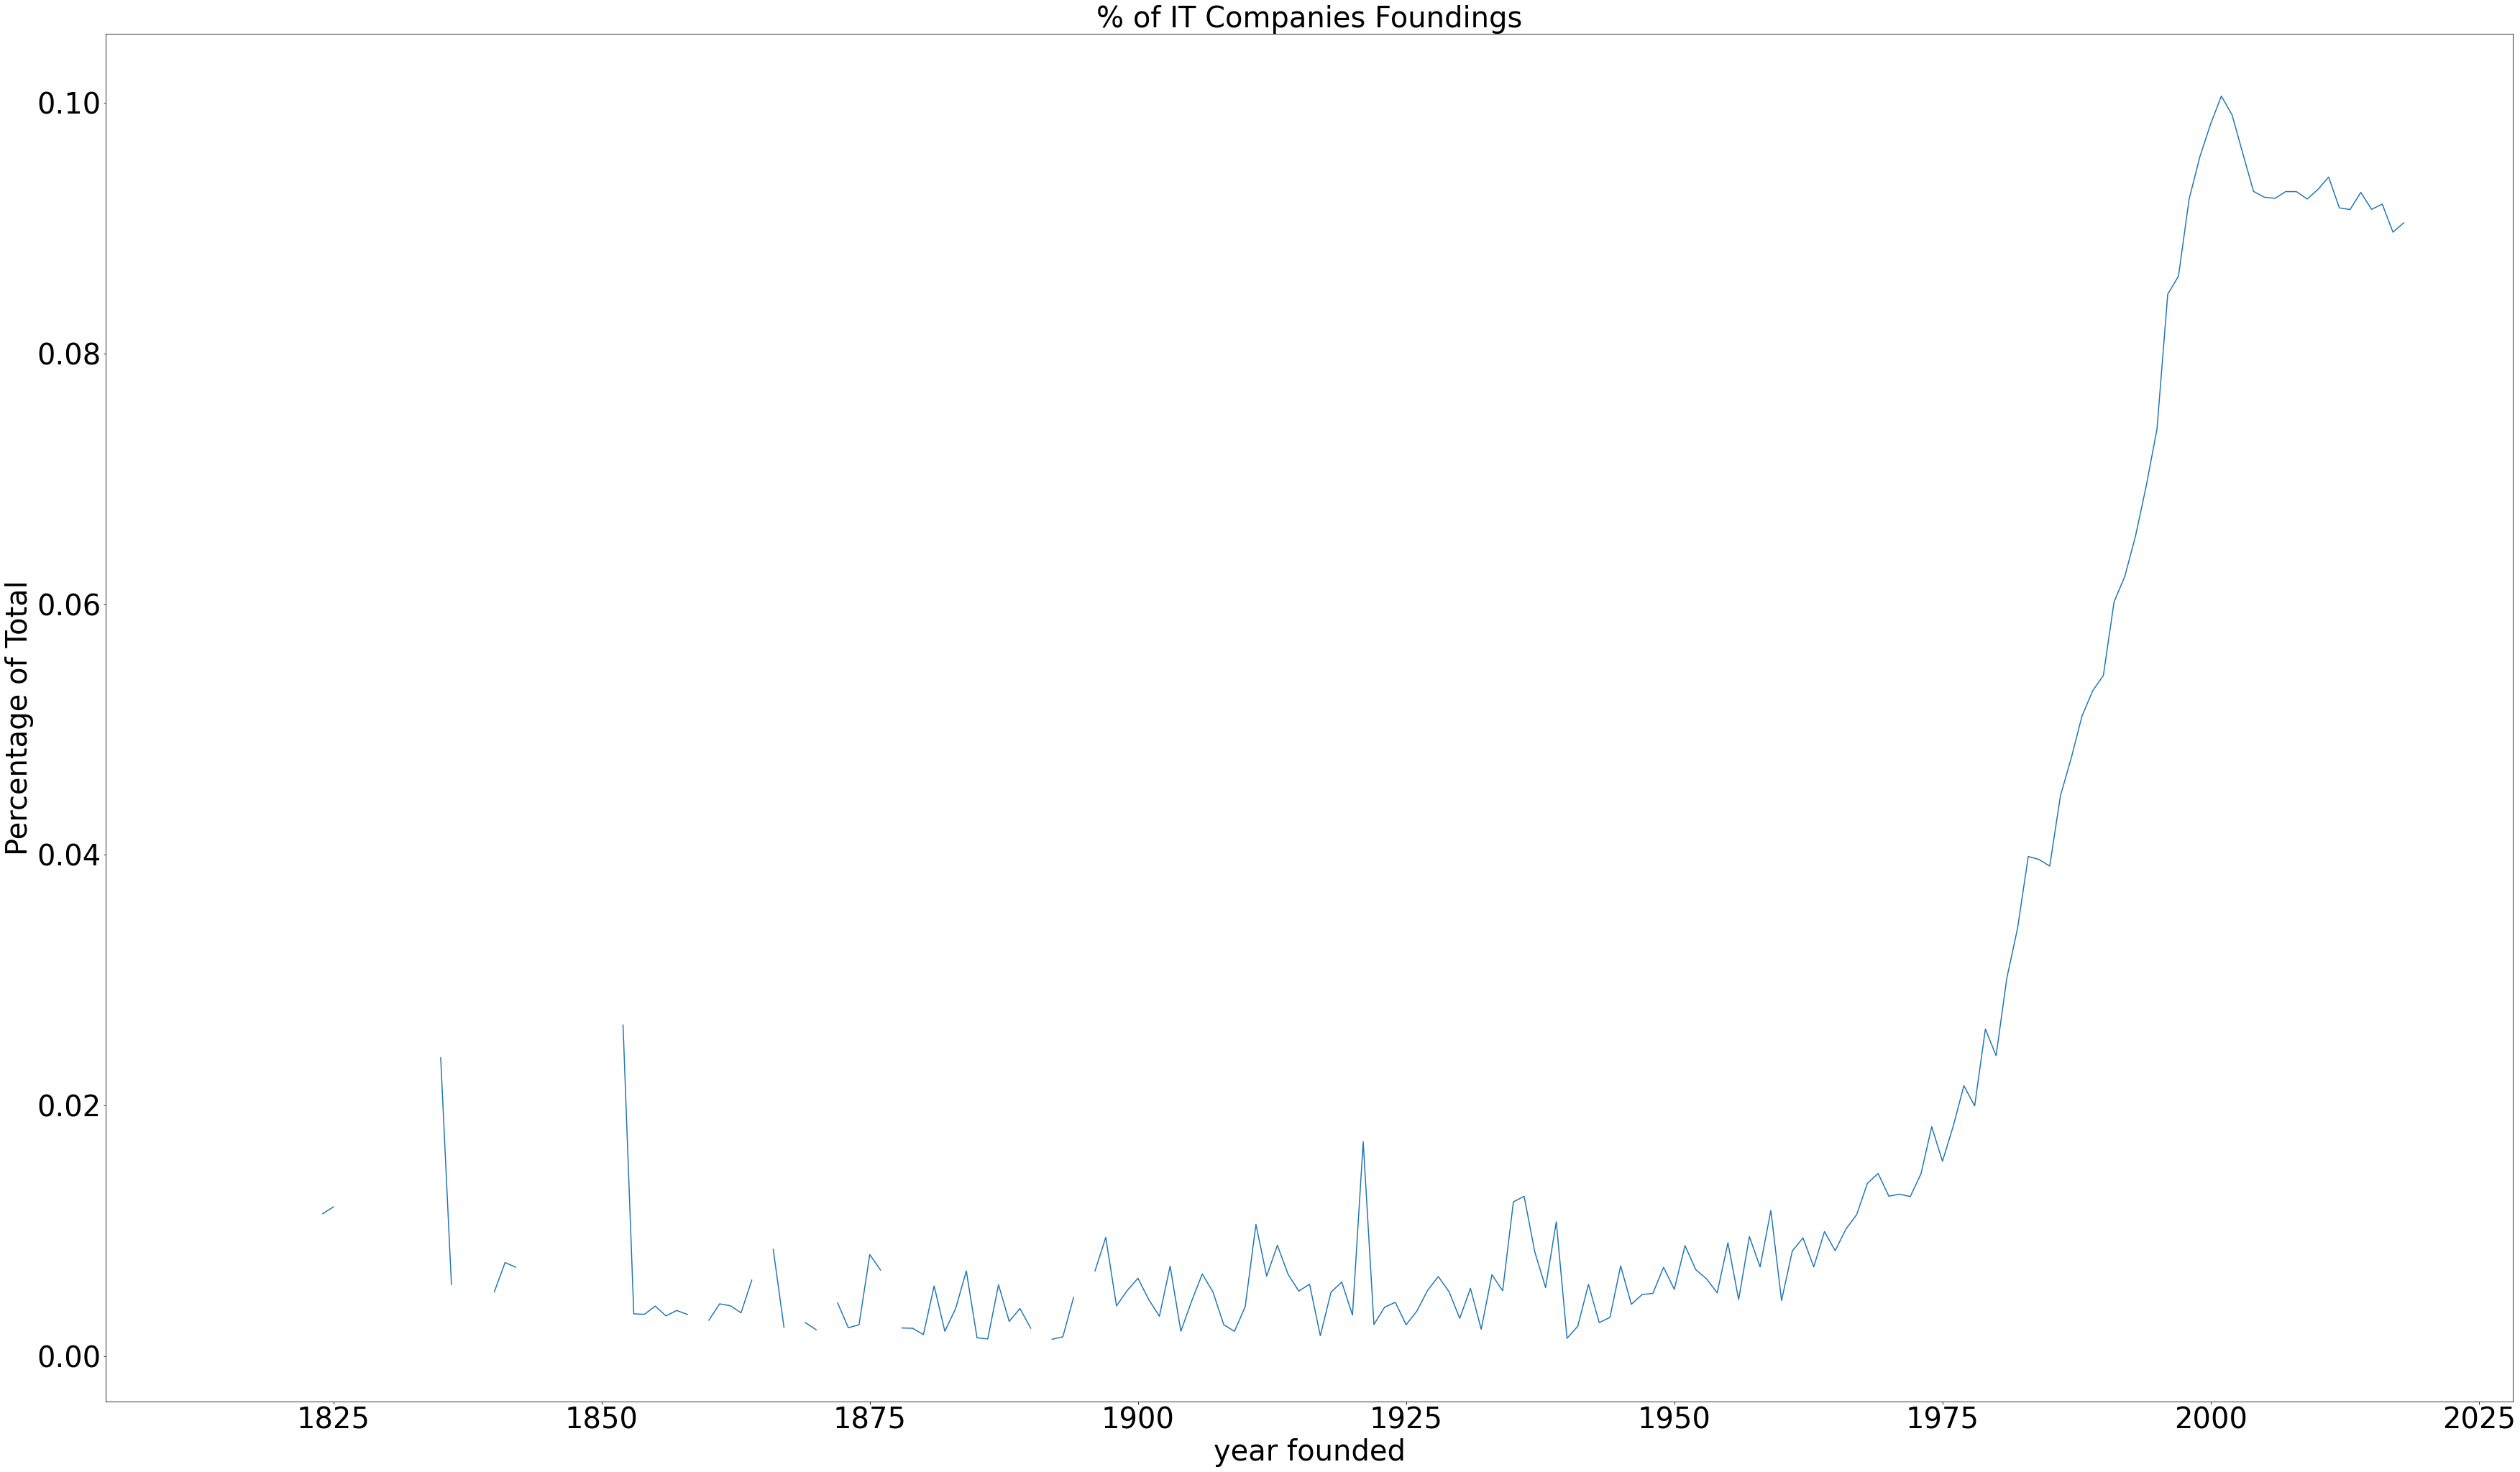

In [8]:
#clear rise of IT industry starting in the 70s through early 2000s
fig = plt.figure(figsize=(60,35)) 
plt.xlabel('Year Founded',fontsize=40)
plt.ylabel('Percentage of Total',fontsize=40)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title('% of IT Companies Foundings',fontsize=40)

it_data_year = data_adjusted[it].groupby('year founded').count()
_=(it_data_year['name']/yearly_companies['name']).plot()
plt.savefig('IT industry growth.png')

In [145]:
data_adjusted['country'].value_counts().head(10)

united states     1100659
united kingdom     231029
canada             131125
netherlands        110134
india               98011
spain               89950
france              84558
brazil              81936
italy               76681
australia           67377
Name: country, dtype: int64

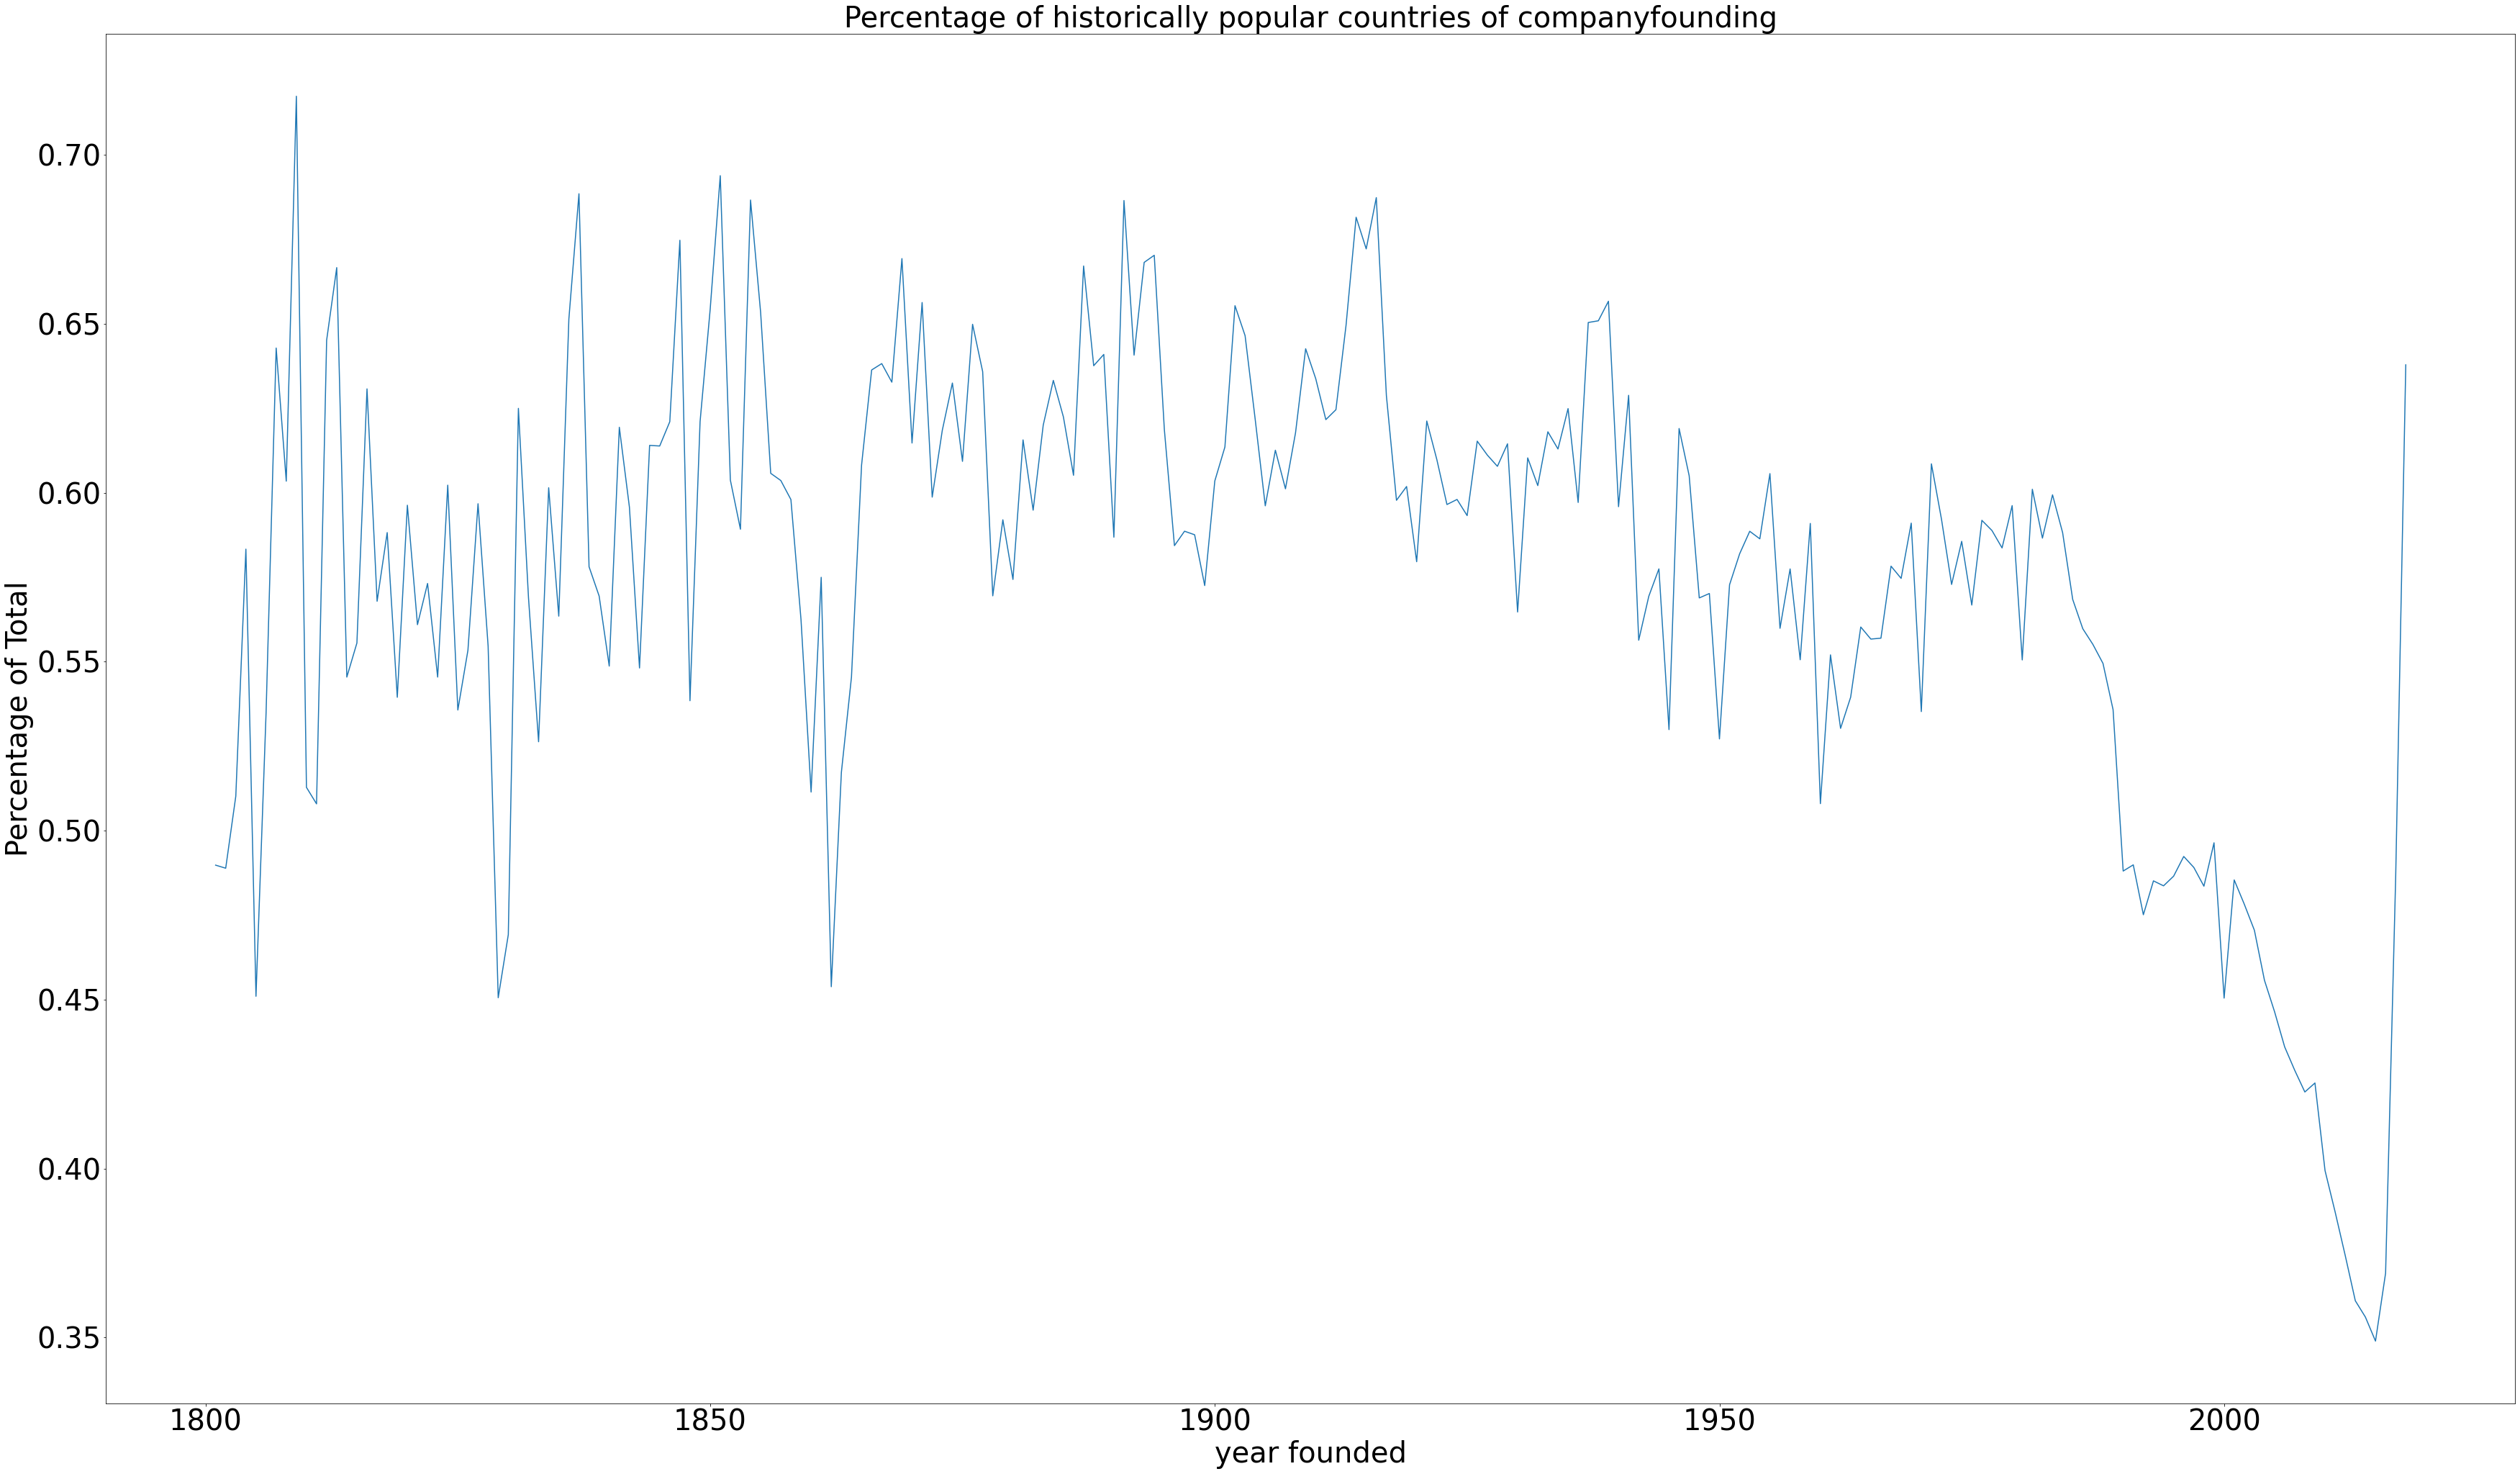

In [9]:
#percentage of top 4 companies over time
fig = plt.figure(figsize=(60,35)) 
plt.xlabel('Year Founded',fontsize=40)
plt.ylabel('Percentage of Total',fontsize=40)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title('Percentage of historically popular countries of companyfounding',fontsize=40)


uk = data_adjusted['country']=='united kingdom'
ca = data_adjusted['country']=='canada'
nl = data_adjusted['country']=='netherlands'
old_data_year = data_adjusted[uk|ca|nl|usa].groupby('year founded').count()
_=(old_data_year['name']/yearly_companies['name']).plot()
plt.savefig('% of company founding by historical leaders.png')